In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
PPsystem = System(alpha=0.05, 
                  delta=0.1, 
                  beta=0.1, 
                  gamma=0.1, 
                  t0=0, 
                  t_end=2000,
                  dt = 0.1)

,values
alpha,0.05
delta,0.10
beta,0.10
gamma,0.10
t0,0.00
t_end,2000.00
dt,0.10


In [3]:
PPstate = State(W=1,E=1)

,values
W,1
E,1


In [4]:
def update_func(state,t,system):
    unpack(system)
    w, e = state
    
    dedt = alpha*e - beta*e*w
    dwdt = delta*e*w - gamma*w
    
    e += dedt * dt
    w += dwdt * dt
    
    return State(W=w, E=e)

In [5]:
update_func(PPstate, 0, PPsystem)

,values
W,1.000
E,0.995


In [6]:
def run_simulation(system, update_func, state):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    return frame

In [7]:
frameData = run_simulation(PPsystem, update_func, PPstate)
frameData.head()

,W,E
0.0,1,1
0.1,1,0.995
0.2,0.99995,0.990025
0.3,0.99985,0.985075
0.4,0.999701,0.980151


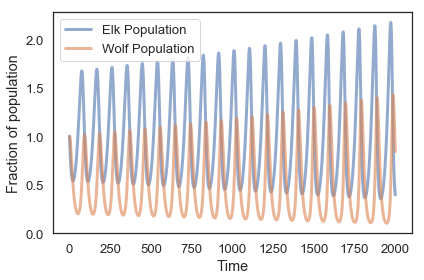

In [8]:
plot(frameData.E, label='Elk Population')
plot(frameData.W, label='Wolf Population')

decorate(xlabel='Time',
             ylabel='Fraction of population')

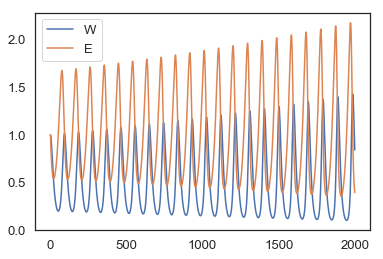

In [9]:
frameData.plot()